# Importing librarires

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('white')

In [94]:
!gdown 1Ct1x-tJEy-rfenQWN4L0u0jC2gW6BKM6
!gdown 10eiZ_rpXrpbm7VrxUhe1TK-y21fBh3Y1

Downloading...
From: https://drive.google.com/uc?id=1Ct1x-tJEy-rfenQWN4L0u0jC2gW6BKM6
To: /content/tmdb_5000_credits.csv
100% 40.0M/40.0M [00:00<00:00, 85.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=10eiZ_rpXrpbm7VrxUhe1TK-y21fBh3Y1
To: /content/tmdb_5000_movies.csv
100% 5.70M/5.70M [00:00<00:00, 183MB/s]


In [95]:
movies = pd.read_csv('tmdb_5000_movies.csv')
print(movies.shape)
movies.head(2)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [96]:
credits = pd.read_csv('tmdb_5000_credits.csv')
print(credits.shape)
credits.head()

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [97]:
# merging the datasets
movies = movies.merge(credits, on = 'title')

In [98]:
print(movies.shape)
movies.head(2)

(4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [99]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [100]:
missing_value = pd.DataFrame({
    'missing' : movies.isna().sum(),
    'percentage' : (movies.isna().sum()/movies.shape[0])*100
})
missing_value.sort_values(by= 'percentage', ascending = False)

,missing,percentage
homepage,3096,64.379289
tagline,844,17.550426
overview,3,0.062383
runtime,2,0.041589
release_date,1,0.020794
cast,0,0.000000
movie_id,0,0.000000
vote_count,0,0.000000
vote_average,0,0.000000
title,0,0.000000


In [101]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

- Hoempage and tagline have high missing values
- We dont need these for recoomendations so we will drop these
- We will not use vote_coutnt prdocution company and vote_average as well
- original_title may contain some titles in diffrent language so we will keep only title feature 
- id and movie_id are redundant

In [102]:
movies.drop(columns = ['homepage','original_language','production_companies',
       'original_title', 'tagline', 'vote_average', 'spoken_languages',
       'vote_count', 'movie_id'], inplace = True)

In [103]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   id                    4809 non-null   int64  
 3   keywords              4809 non-null   object 
 4   overview              4806 non-null   object 
 5   popularity            4809 non-null   float64
 6   production_countries  4809 non-null   object 
 7   release_date          4808 non-null   object 
 8   revenue               4809 non-null   int64  
 9   runtime               4807 non-null   float64
 10  status                4809 non-null   object 
 11  title                 4809 non-null   object 
 12  cast                  4809 non-null   object 
 13  crew                  4809 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 563.6+ KB


In [104]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = movies['release_date'].dt.year
movies.drop(columns = ['release_date'],inplace =True)

## Cleaning json columns


- From genres , keywords and production_countries we need to take all values of key name in a list .
- From cast we will take first three cast members 
- From crew we will only take the director of the movie

In [105]:
movies.head(1)


,budget,genres,id,keywords,overview,popularity,production_countries,revenue,runtime,status,title,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,Released,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0


In [106]:
def clean(data):
  res = []
  data = json.loads(data)
  for i in data:
    res.append(i['name'])
  return res

In [107]:
movies['genres'] = movies.genres.apply(clean)
movies['keywords'] = movies['keywords'].apply(clean)
movies['production_countries'] = movies['production_countries'].apply(clean)

In [108]:
def clean_cast(data):
  res = []
  data = json.loads(data)
  cnt = 0
  for i in data:
    if cnt != 3 :
      res.append(i['name'])
      cnt += 1
    else:
      break
  return res

In [109]:
movies['cast'] = movies.cast.apply(clean_cast)

In [110]:
def clean_director(data):
  res = []
  data = json.loads(data)
  for i in data:
    if i['job'] == "Director":
      res.append(i['name'])
      break
  return res

In [111]:
movies['director'] = movies.crew.apply(clean_director)
movies.drop(columns =['crew'],inplace = True)

In [112]:
## tokenizing overview
movies['overview'] = movies['overview'].apply(lambda x:str(x).split())

In [113]:
movies.head(2)

,budget,genres,id,keywords,overview,popularity,production_countries,revenue,runtime,status,title,cast,year,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[United States of America, United Kingdom]",2787965087,162.0,Released,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",2009.0,[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,[United States of America],961000000,169.0,Released,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",2007.0,[Gore Verbinski]


In [114]:
#removing spaces between words and turning all chaarcters to lower case
movies['genres'] = movies['genres'].apply(lambda x : [i.lower().replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x : [i.lower().replace(" ","") for i in x])
movies['production_countries'] = movies['production_countries'].apply(lambda x : [i.lower().replace(" ","") for i in x])
movies['director'] = movies['director'].apply(lambda x : [i.lower().replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x : [i.lower().replace(" ","") for i in x])

## Exploratory Data Aanalysis

### Shape of the data

In [115]:
print("No. of rows: ", movies.shape[0])
print("No. of columns: ", movies.shape[1])

No. of rows:  4809
No. of columns:  14


In [116]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   id                    4809 non-null   int64  
 3   keywords              4809 non-null   object 
 4   overview              4809 non-null   object 
 5   popularity            4809 non-null   float64
 6   production_countries  4809 non-null   object 
 7   revenue               4809 non-null   int64  
 8   runtime               4807 non-null   float64
 9   status                4809 non-null   object 
 10  title                 4809 non-null   object 
 11  cast                  4809 non-null   object 
 12  year                  4808 non-null   float64
 13  director              4809 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 563.6+ KB


In this dataset we have **8 object columns** and **6 number columns**

#### Numerical features

In [117]:
movies.describe()

,budget,id,popularity,revenue,runtime,year
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4808.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,2002.457363
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,12.424628
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,1916.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,1999.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,2005.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,2011.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,2017.000000


- There are entries with 0 budget, 0popularity , 0 zero revenue and 0 runtime which seems like error values.
- We have movies releaased between 1916 and 2017.
- average runtime of movies 106.88

In [118]:
movies[movies['popularity'] == 0]

,budget,genres,id,keywords,overview,popularity,production_countries,revenue,runtime,status,title,cast,year,director
4559,0,[],380097,[],"[1971, post, civil, rights, San, Francisco, se...",0.0,[],0,0.0,Released,America Is Still the Place,[],NaN,[]


No data for this entry is available so we will directly drop the row

In [119]:
movies.drop(movies[movies['popularity'] == 0].index, inplace= True)

In [120]:
print('0 budget:', movies[movies['budget'] == 0].shape[0]/len(movies))
print('0 revenue:',movies[movies['revenue'] == 0].shape[0]/len(movies))
print('0 runtime:',movies[movies['runtime'] == 0].shape[0]/len(movies))

0 budget: 0.2158901830282862
0 revenue: 0.2972129783693844
0 runtime: 0.007071547420965058


- Large amount of data has 0 values for these features.
- We wont be using these feature to create the tags fro recomendations

In [121]:
movies.drop(columns = ['budget','revenue','runtime'],inplace= True)

In [122]:
# Feature engineering decade from years
bins = [1909, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009,2019]
labels = ['20s', '30s' ,'40s' , '50s' , '60s', '70s' ,'80s', '90s', '2000s', '2010s']
movies['release_decade'] = pd.cut(movies['year'] , bins = bins ,labels= labels).astype('object')
movies.head(2)

,genres,id,keywords,overview,popularity,production_countries,status,title,cast,year,director,release_decade
0,"[action, adventure, fantasy, sciencefiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[unitedstatesofamerica, unitedkingdom]",Released,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",2009.0,[jamescameron],2000s
1,"[adventure, fantasy, action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,[unitedstatesofamerica],Released,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",2007.0,[goreverbinski],2000s


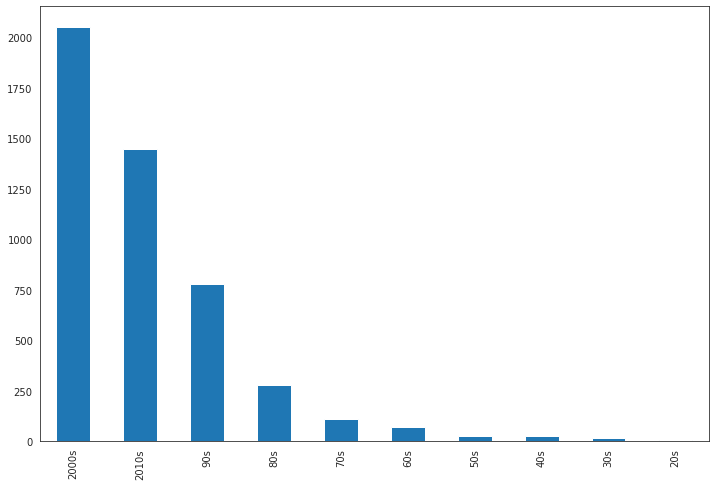

In [123]:
movies.release_decade.value_counts().plot(kind ='bar')

In [124]:
movies.release_decade.value_counts(normalize = True)

2000s    0.426373
2010s    0.300957
90s      0.161814
80s      0.058236
70s      0.022671
60s      0.014975
50s      0.005616
40s      0.005200
30s      0.003120
20s      0.001040
Name: release_decade, dtype: float64

- 42% of movies are released between 2000-2009
- 88% of the movies are between 1990-2019

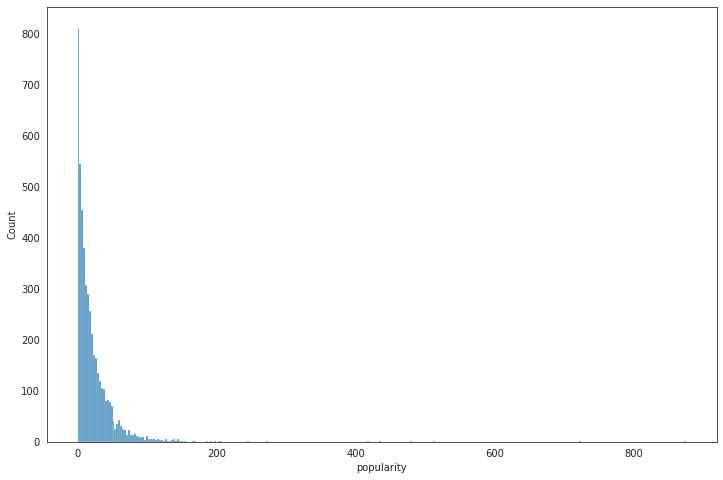

In [125]:
#popularity
sns.histplot(data=movies, x = 'popularity')

- Majority movies have a popularity under 100 with only 1.8% movies above it

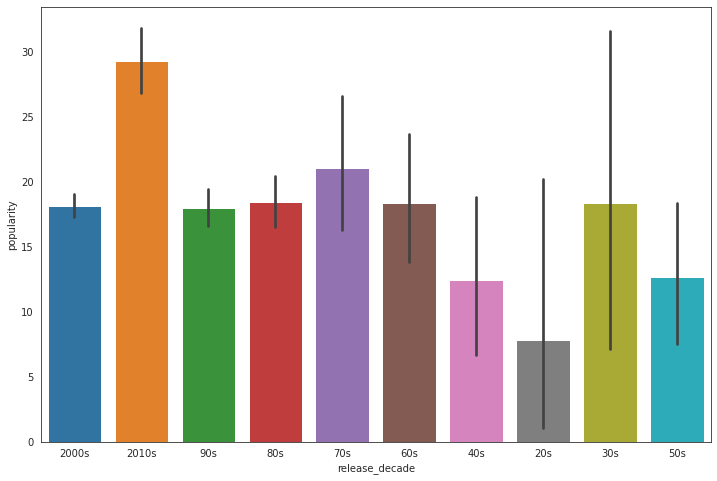

In [126]:
## popularity and reelase decade
sns.barplot(data=movies , x= 'release_decade', y = 'popularity')

- Movies reelased after 2009 have highest popularity - this may be due to recency.
- second most popular decade is 70s
- Movies released before 1930 have lowest popularities which is as expected.


In [127]:
movies.status.value_counts()

Released           4800
Rumored               5
Post Production       3
Name: status, dtype: int64

only 8 rows have different value for the sataus featrue, we can directly drop the feature.

In [128]:
movies.drop(columns='status',inplace=True)

In [129]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4808
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                4808 non-null   object 
 1   id                    4808 non-null   int64  
 2   keywords              4808 non-null   object 
 3   overview              4808 non-null   object 
 4   popularity            4808 non-null   float64
 5   production_countries  4808 non-null   object 
 6   title                 4808 non-null   object 
 7   cast                  4808 non-null   object 
 8   year                  4808 non-null   float64
 9   director              4808 non-null   object 
 10  release_decade        4808 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 579.8+ KB


#### To explore object features, we first need to explode them.

In [130]:
df = movies.copy()

In [131]:
df = df.explode('genres')
df = df.explode('cast')
df = df.explode('production_countries')
df = df.explode('director')

In [132]:
df.shape

(51051, 11)

#### Genres

In [133]:
df.genres.value_counts(normalize =True)*100

drama             18.976370
comedy            12.428669
thriller          11.150113
action            10.112756
romance            7.030101
adventure          6.886950
crime              5.910383
sciencefiction     4.414158
horror             4.198451
family             3.857241
fantasy            3.676831
mystery            3.012060
history            1.992352
animation          1.741347
war                1.517796
music              1.380528
western            0.700069
documentary        0.688303
foreign            0.278459
tvmovie            0.047063
Name: genres, dtype: float64

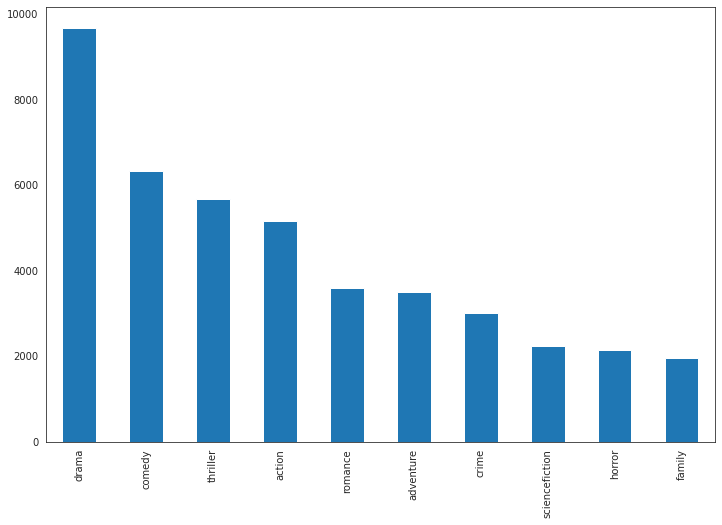

In [134]:
df.genres.value_counts().head(10).plot(kind = 'bar')

In [135]:
print('Top 10 genres : ')
print(df.genres.value_counts().head(10).index.to_list())

Top 10 genres : 
['drama', 'comedy', 'thriller', 'action', 'romance', 'adventure', 'crime', 'sciencefiction', 'horror', 'family']


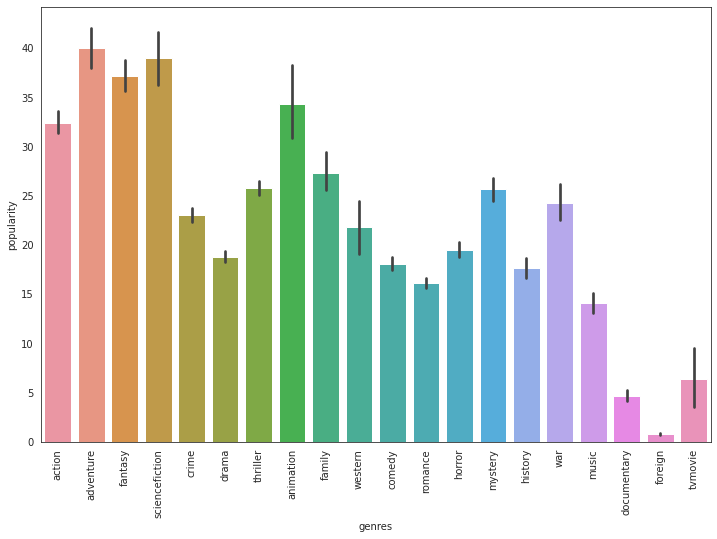

In [136]:
sns.barplot(data=df,x='genres',y='popularity')
plt.xticks(rotation = 90)
plt.show()

- adventure and science fiction have the highest popularity and foreign has the lowest.

#### Cast

In [137]:
df.cast.value_counts(normalize =True).head(10)

nicolascage        0.003118
mattdamon          0.003098
johnnydepp         0.002863
angelinajolie      0.002843
bradpitt           0.002628
robertdeniro       0.002608
brucewillis        0.002588
samuell.jackson    0.002490
piercebrosnan      0.002471
nicolekidman       0.002334
Name: cast, dtype: float64

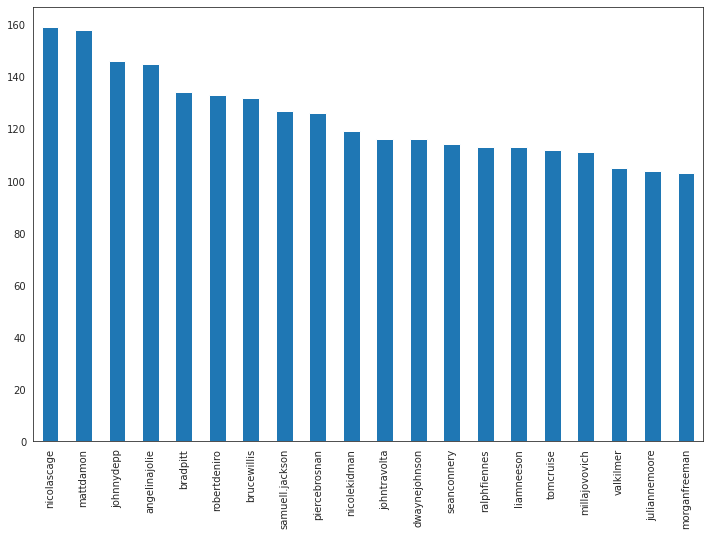

In [138]:
df.cast.value_counts().head(20).plot(kind='bar')

In [139]:
df.groupby(by='cast')['popularity'].mean().sort_values(ascending=False).head(10)

cast
jonhamm            587.250463
morenabaccarin     514.569956
davebautista       362.455615
chrispratt         289.234741
jessicachastain    261.897976
ryanpotter         203.734590
scottadsit         203.734590
melissabenoist     192.528841
nicholashoult      179.460240
jonathangroff      165.125366
Name: popularity, dtype: float64

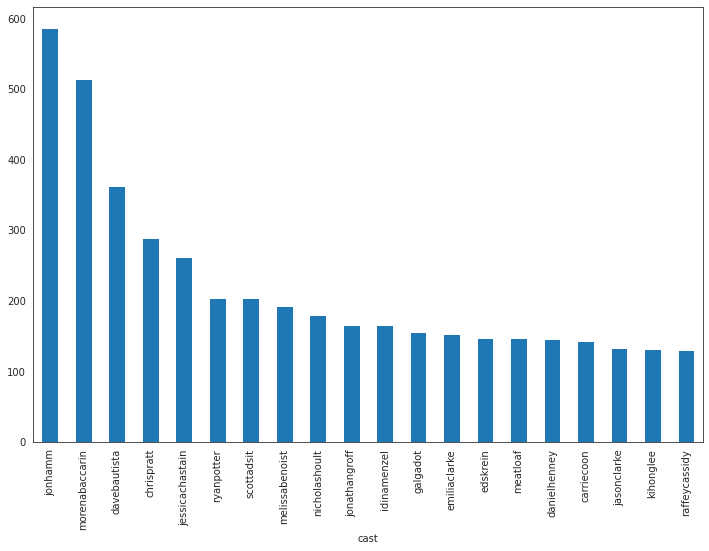

In [140]:
df.groupby(by='cast')['popularity'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

Top 10 cast based on popularity:
- jon hamm
- morena baccarin
- dave bautista
- chris pratt
- jessica chastain
- ryan potter
- scott adsit
- melissa benoist
- nicholas hoult
- jonathan groff

#### Director

In [141]:
df.director.value_counts(normalize =True).head(10)

ridleyscott         0.006004
paulw.s.anderson    0.006004
stevenspielberg     0.005474
woodyallen          0.005357
rennyharlin         0.004238
oliverstone         0.004003
paulgreengrass      0.003885
peterhyams          0.003708
timburton           0.003473
martinscorsese      0.003355
Name: director, dtype: float64

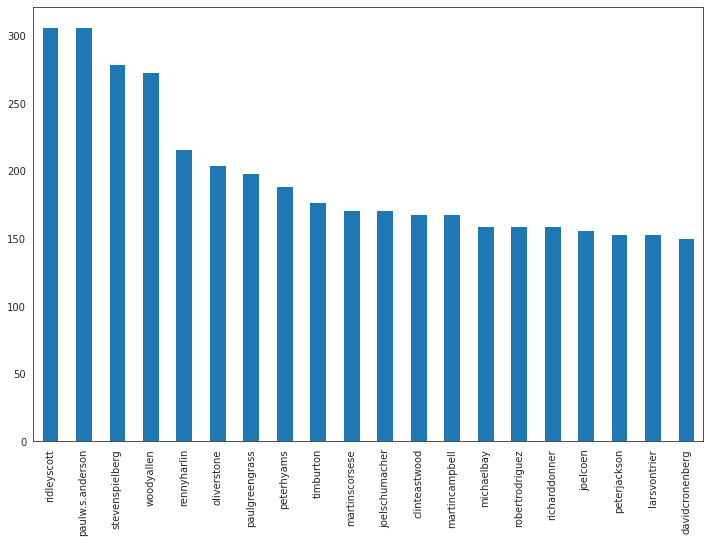

In [142]:
df.director.value_counts().head(20).plot(kind='bar')

In [143]:
df.groupby(by='director')['popularity'].mean().sort_values(ascending=False).head(10)

director
kylebalda           875.581305
timmiller           514.569956
christophernolan    251.130290
colintrevorrow      221.947277
jamesgunn           201.811275
damienchazelle      192.528841
chrisbuck           165.125366
alantaylor          158.095618
georgemiller        139.643396
chriswilliams       131.784051
Name: popularity, dtype: float64

Text(0, 0.5, 'Popularity')

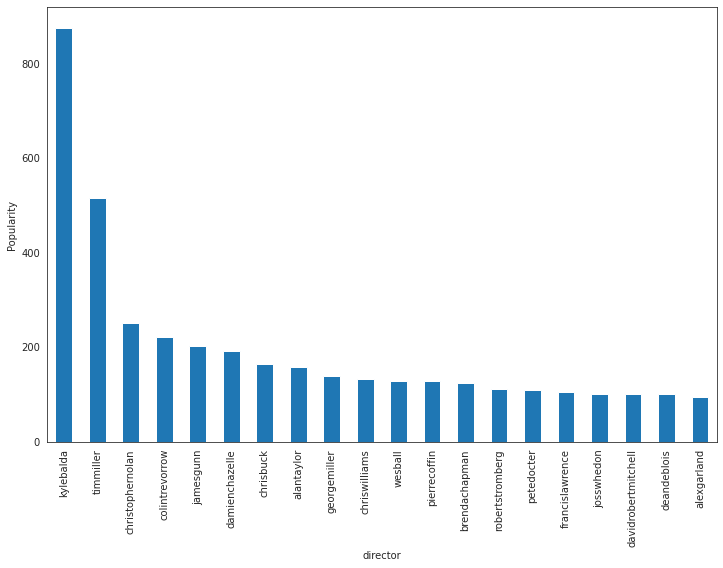

In [144]:
df.groupby(by='director')['popularity'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Popularity')

Top 10 directors base don popularity:
- kyle balda 
- tim miller 
- christopher nolan 
- colin trevorrow 
- james gunn  
- damien chazelle 
- chris buck  
- alan taylor 
- george miller 
- chris williams 

#### Production Countries

In [145]:
df.production_countries.value_counts(normalize = True).head(10)

unitedstatesofamerica    0.605889
unitedkingdom            0.102889
germany                  0.052252
france                   0.046949
canada                   0.040510
australia                0.017583
italy                    0.010745
china                    0.010646
spain                    0.010147
japan                    0.009749
Name: production_countries, dtype: float64

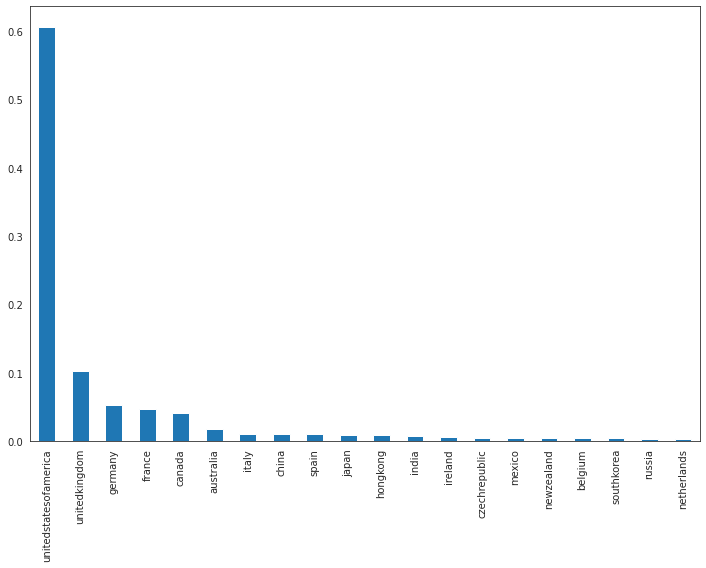

In [146]:
df.production_countries.value_counts(normalize = True).head(20).plot(kind = 'bar')

60% of movies are produced in United States of America

## Model Building

In [147]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4808
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                4808 non-null   object 
 1   id                    4808 non-null   int64  
 2   keywords              4808 non-null   object 
 3   overview              4808 non-null   object 
 4   popularity            4808 non-null   float64
 5   production_countries  4808 non-null   object 
 6   title                 4808 non-null   object 
 7   cast                  4808 non-null   object 
 8   year                  4808 non-null   float64
 9   director              4808 non-null   object 
 10  release_decade        4808 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 579.8+ KB


- For making recommendations we will make a Content Based recommender system.
- we will create tags from all categorical features and then find similarities.
- We will not use popularity feature in tags.

#### Creating feature: tags

In [148]:
def str_to_list(data):
  x = []
  x.append(data)
  return x

In [149]:
movies['tags'] = movies.genres + movies.keywords + movies.overview + movies.production_countries + movies.cast + movies.director + movies.release_decade.apply(str_to_list)

In [150]:
movies['tags'].head(1).values

array([list(['action', 'adventure', 'fantasy', 'sciencefiction', 'cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d', 'In', 'the', '22nd', 'century,', 'a', 'paraplegic', 'Marine', 'is', 'dispatched', 'to', 'the', 'moon', 'Pandora', 'on', 'a', 'unique', 'mission,', 'but', 'becomes', 'torn', 'between', 'following', 'orders', 'and', 'protecting', 'an', 'alien', 'civilization.', 'unitedstatesofamerica', 'unitedkingdom', 'samworthington', 'zoesaldana', 'sigourneyweaver', 'jamescameron', '2000s'])],
      dtype=object)

In [151]:
df = movies[['id', 'title' , 'tags']]
df.head()

,id,title,tags
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action, ocean, drugabuse,..."
2,206647,Spectre,"[action, adventure, crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller, dccomics, cri..."
4,49529,John Carter,"[action, adventure, sciencefiction, basedonnov..."


In [152]:
# df['tags'] = df.tags.apply(lambda x: " ".join(x))

#### text vectorization

In [64]:
ps = PorterStemmer()
def stem(text):
  y = []
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)
df['tags'] = df.tags.apply(stem)

In [65]:
# vector matrix
cv = CountVectorizer(max_features=5000, stop_words = 'english')
vec = cv.fit_transform(df['tags']).toarray()
cv.get_feature_names()[-10:]

In [68]:
similarity = cosine_similarity(vec)
similarity

- we need to hold the index of the value for to tract similiarity relations so we will use enumerate

In [70]:
def recommend(movie):
  movie_idx = df[df['title'] == movie].index[0]
  sim = similarity[movie_idx]
  sim_movie_list = sorted(list(enumerate(sim)), reverse = True , key = lambda x : x[1])[1:6]

  for mov in sim_movie_list:
    print(df.iloc[mov[0]].title)

In [87]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Titan A.E.
The Helix... Loaded
Falcon Rising


In [153]:
recommend('Aliens')

Alien
Alien³
Meet Dave
Star Trek: Insurrection
Escape from Planet Earth


In [165]:
df.to_pickle("/content/drive/MyDrive/TMDB recommender/movies_data.pkl")


In [164]:
import pickle

pickle_out = open("/content/drive/MyDrive/TMDB recommender/similarity_matrix.pkl", mode = 'wb')
pickle.dump(similarity , pickle_out)
pickle_out.close()
# files.download("similarity_matrix.pkl")